<a href="https://colab.research.google.com/github/TAUforPython/BaseControlTheory/blob/main/%D0%B1%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5_%D0%B8%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BC%D0%B5%D0%BD%D1%82%D1%8B_%D0%A2%D0%90%D0%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python Control Systems Library
ссылка на [документацию](https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/4_First_and_second_order_system_dynamics/First%20order%20systems.html)

# Модель систем - дифференциальное уравнение

In [ ]:
!pip install sympy

Обыкновенное линейное дифференциальное уравнение второго порядка:

\\begin{cases}
 & T^2 \frac{\mathrm{d^{2} y} }{\mathrm{d} t^{2}}  + 2*T \zeta \frac{\mathrm{d y} }{\mathrm{d} t}  + y(t) = Ku(t)
\end{cases}

In [ ]:
import sympy
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols

# Определяем переменные
t = sympy.symbols('t', positive = True, real = True)
y = sympy.Function('y', positive = True, real = True)
T = sympy.symbols('T', positive = True, real = True)
K = sympy.symbols('K', positive = True, real = True)
zeta = sympy.symbols('zeta', positive = True, real = True)

In [ ]:
# Определяем уравнение
equation = sympy.Eq(y(t).diff(t,t), K / T**2 * cos(0.6*t) - 2/T * zeta * y(t).diff(t) - 1/T**2 * y(t) )

# Решаем уравнение
solution = sympy.dsolve(equation, y(t), ics = {y(0): 0, y(t).diff(t).subs(t, 0): 0})

print(solution)

Eq(y(t), (-0.976230998898279*sin(0.49749371855331*t) + 1.7515923566879*cos(0.49749371855331*t))*exp(-0.05*t) + 0.955414012738854*sin(0.6*t) - 1.7515923566879*cos(0.6*t))


In [ ]:
h = solution.subs({K: 1, T: 2, zeta: 0.1})
print(h)

Eq(y(t), (-0.976230998898279*sin(0.49749371855331*t) + 1.7515923566879*cos(0.49749371855331*t))*exp(-0.05*t) + 0.955414012738854*sin(0.6*t) - 1.7515923566879*cos(0.6*t))


In [ ]:
sympy.simplify(h)

Eq(y(t), 20.0*sin(0.5*t) - 20.1007563051842*exp(-0.05*t)*sin(0.49749371855331*t))

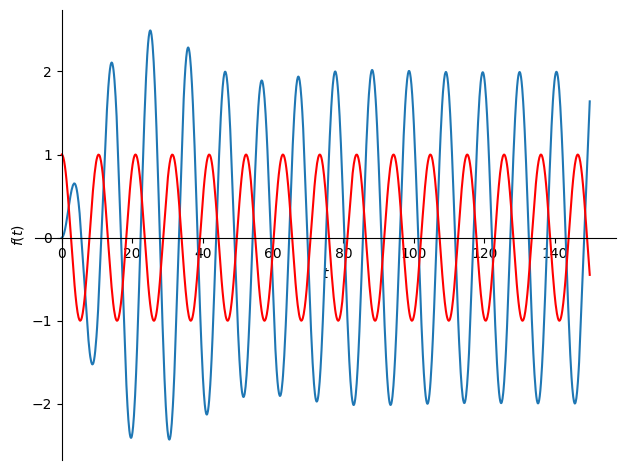

In [ ]:
p = sympy.plot(h.rhs, cos(0.6*t), (t,0,150), show = False)
p[1].line_color = 'red'
p[1].line_stype = ':'
p.show()

# Частотная характеристика и преобразование Фурье

In [ ]:
import sympy

In [ ]:
i2pi = sympy.I*2*sympy.pi
exp = sympy.exp
def S(N):
    return sum(c(n)*exp(i2pi*n*t/P) for n in range(-N, N+1)).expand(complex=True).simplify()

def c(n):
    return (sympy.integrate(
               f(t)*exp((-i2pi * n * t)/P),
               (t, t0, t0 + P))/P)
def f(t):
    return t

In [ ]:
P = 20
t0 = -10
N = 7

In [ ]:
t = sympy.Symbol('t', real=True)

In [ ]:
analytic_approx = S(N).expand()
analytic_approx

20*sin(pi*t/10)/pi - 10*sin(pi*t/5)/pi + 20*sin(3*pi*t/10)/(3*pi) - 5*sin(2*pi*t/5)/pi + 4*sin(pi*t/2)/pi - 10*sin(3*pi*t/5)/(3*pi) + 20*sin(7*pi*t/10)/(7*pi)

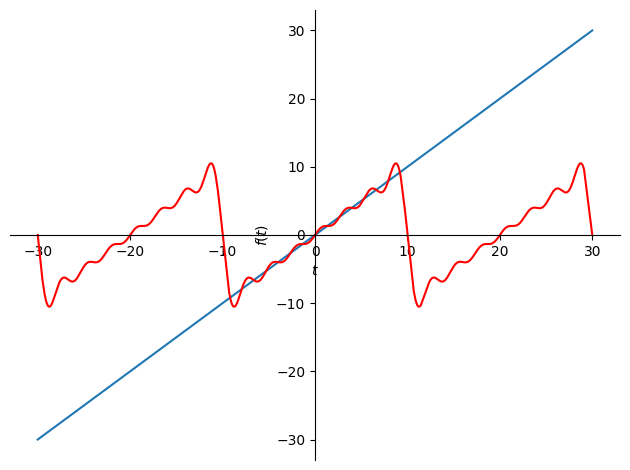

In [ ]:
interval = (t, t0-P, t0+2*P)
p1 = sympy.plot(f(t), interval, show=False)
p2 = sympy.plot(analytic_approx, interval, show=False)
p2[0].line_color = 'red'
p1.extend(p2)
p1.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# гармонический детерминированный сигнал
# число точек в выборке
N = 60*5
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0
t = np.linspace(0.0, T, N)

#y = np.cos(1.0 * 2.0*np.pi*t) + 10 * np.cos(12.0 * 2.0*np.pi*t) + 0.5*np.sin(3.0 * 2.0*np.pi*t)
y = np.cos(1.0 * 2.0*np.pi*t) + t

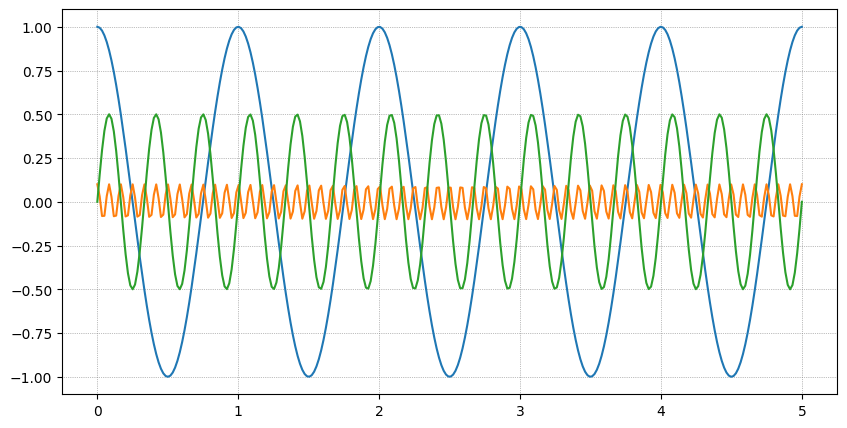

In [ ]:
# Визуализация трех гармонических сигналов
plt.figure(figsize=(10, 5))
plt.plot(t, np.cos(1.0 * 2.0*np.pi*t), t, 0.1*np.cos(12.0 * 2.0*np.pi*t), t, 0.5*np.sin(3.0 * 2.0*np.pi*t))
#plt.plot(t, y)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

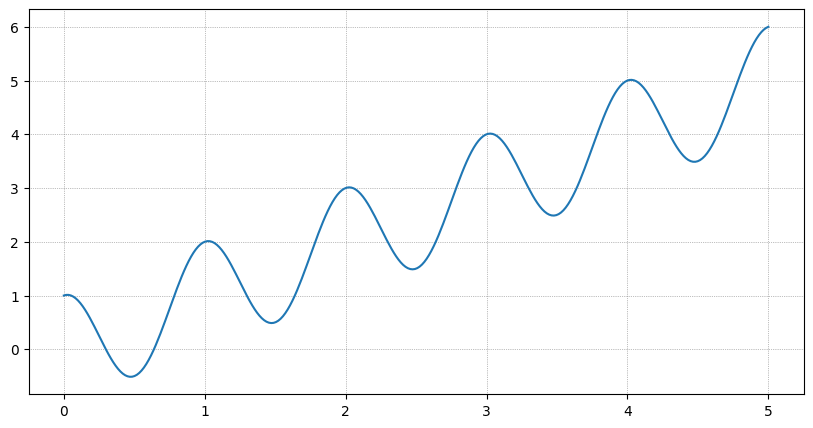

In [ ]:
# Визуализация трех гармонических сигналов
plt.figure(figsize=(10, 5))
plt.plot(t, y)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

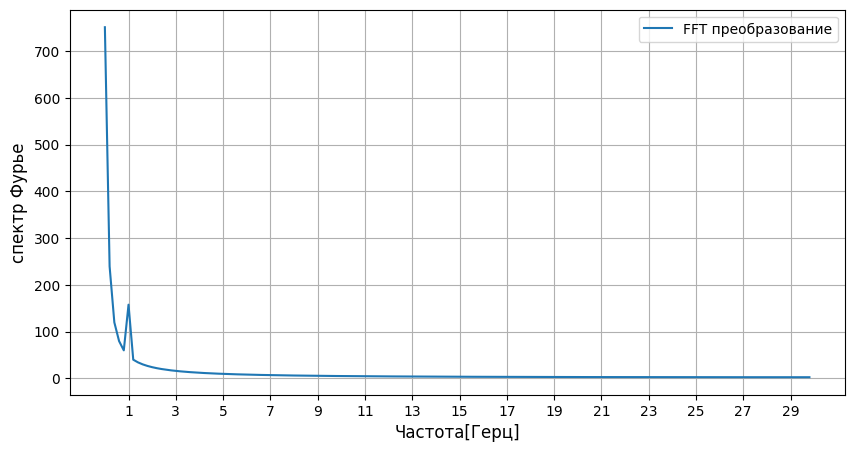

In [ ]:
from scipy.fft import fft, fftfreq

yf = fft(y)
xf = fftfreq(N, T/N)[:N//2]
# спект Фурье симметричен относительно нуля, поэтому берем только правую его часть
plt.figure(figsize=(10, 5))
plt.plot(xf, np.abs(yf[0:N//2]),label='FFT преобразование')
plt.xlabel('Частота[Герц]', fontsize=12)
plt.ylabel('спектр Фурье', fontsize=12)
plt.xticks(np.arange(1, np.max(xf), 2))
plt.grid()
plt.legend()
plt.show()

# Передаточная функция и преобразование Лапласа

In [ ]:
import sympy

In [ ]:
t, s = sympy.symbols('t, s')
T = sympy.symbols('T', real=True, positive=True)
K = sympy.symbols('K', real=True, positive=True)
zeta = sympy.symbols('zeta', real=True, positive=True)

W = K/((T**2*s**2 + 2*zeta*T*s + 1))

In [ ]:
W

K/(T**2*s**2 + 2*T*s*zeta + 1)

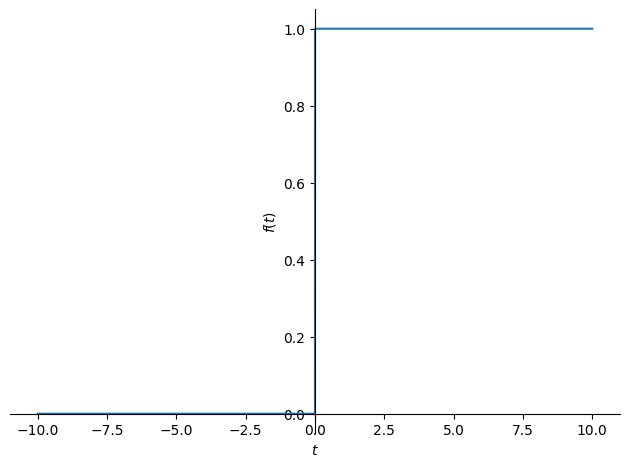

In [ ]:
#пример ступенчатой функции
sympy.Heaviside(t)
sympy.plot(sympy.Heaviside(t))

In [ ]:
# определяем функцию прямого и обратного преобразования Лапласа
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [ ]:
invL(W)

K*exp(-t*zeta/T)*sin(t*sqrt(1 - zeta**2)/T)*Heaviside(t)/(T*sqrt(1 - zeta**2))

In [ ]:
h = invL(W).subs({K: 1, T: 2, zeta: 0.1})
print(h)

0.502518907629606*exp(-0.05*t)*sin(0.49749371855331*t)*Heaviside(t)


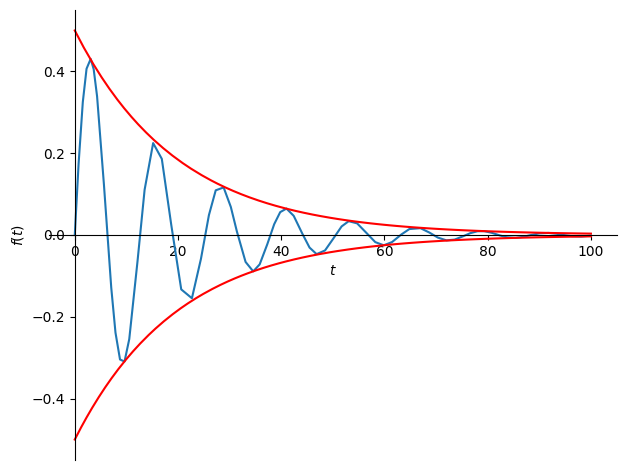

In [ ]:
from sympy import*
p = sympy.plot(h,0.5*exp(-0.05*t),-0.5*exp(-0.05*t),(t,0,100), show = False)
p[1].line_color = 'red'
p[2].line_color = 'red'
p.show()

In [ ]:
from sympy import*
#var('s a b')
var('t', positive = True)

y1 = sin(3*t)
#y2 = exp(-7*t)
y2 = 1
# Прямое преобразование a*L{y1(t)}:
L1 = 5 * laplace_transform(y1, t, s, noconds = True)
# Прямое преобразование b*L{y2(t)}:
L2 = 3 * laplace_transform(y2, t, s, noconds = True)
# Сумма a*L{f(t)}+b*L{q(t)}:

L = factor(L1 * L2)
print (L)

45/(s*(s**2 + 9))


5 - 5*cos(3*t)


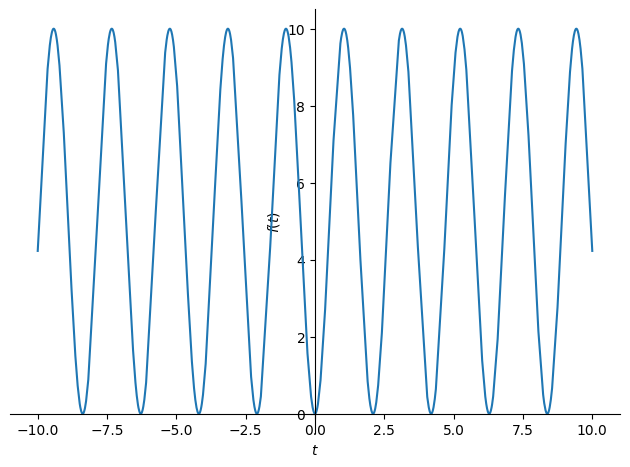

In [ ]:
from sympy import*

h = inverse_laplace_transform(L, s, t)
print(h)
sympy.plot(h)

-5*cos(3*t)*Heaviside(t) + 5*Heaviside(t)


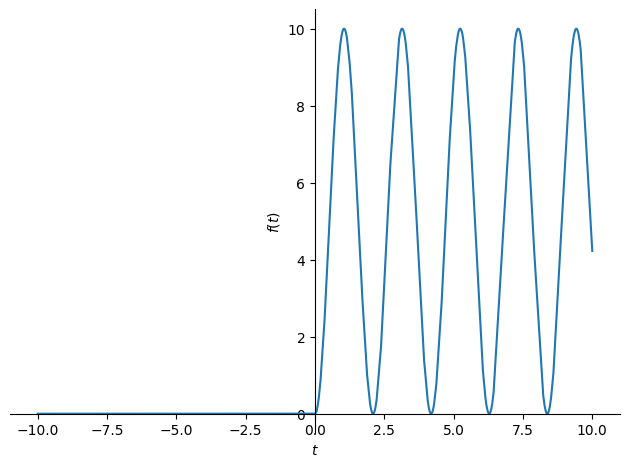

In [ ]:
from sympy import*

s = symbols('s')
t = symbols('t', real = True)
T = symbols('T', positive = True)
K = symbols('K', positive = True)
h = inverse_laplace_transform(L, s, t)
print(h)
sympy.plot(h)

In [ ]:
from sympy import *
s = symbols('s', complex=True, real=False)
t = symbols('t', real = True)
ksi = symbols('ksi', positive = True)
T = symbols('T', positive = True)
K = symbols('K', positive = True)

F = simplify((K * s**2)/(T * s**2 + 2*ksi*T*s + 1))
print(F)
t = symbols('t', real = True)
exp = inverse_laplace_transform(F, s, t)
print(exp)

K*s**2/(2*T*ksi*s + T*s**2 + 1)
K*((sqrt(T)*(2*ksi**2/T - 1/T**2)*exp(-ksi*t)*sin(t*sqrt(-T*ksi**2 + 1)/sqrt(T))/sqrt(-T*ksi**2 + 1) - 2*ksi*exp(-ksi*t)*cos(t*sqrt(-T*ksi**2 + 1)/sqrt(T))/T)*Heaviside(t) + DiracDelta(t)/T)


In [ ]:
from sympy import *
F = 1 * s**2/(2 * s**2 + 2*0.1*3*s + 1)
print(F)
exp = inverse_laplace_transform(F, s, t)
print(exp)

s**2/(2*s**2 + 0.6*s + 1)
(-0.329226445408052*exp(-0.15*t)*sin(0.691013748054263*t) - 0.15*exp(-0.15*t)*cos(0.691013748054263*t))*Heaviside(t) + 0.5*DiracDelta(t)


In [ ]:
from sympy import *
F = apart(F)
print(F)
exp = inverse_laplace_transform(F, s, t)
print((exp))

-0.25*(0.6*s + 1.0)/(1.0*s**2 + 0.3*s + 0.5) + 0.5
-0.25*(1.31690578163221*exp(-0.15*t)*sin(0.691013748054263*t) + 0.6*exp(-0.15*t)*cos(0.691013748054263*t))*Heaviside(t) + 0.5*DiracDelta(t)


In [ ]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(Number)})

In [ ]:
round_expr(exp,2)

NameError: ignored

# Типовые передаточные функции

In [ ]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
import control
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#передаточная функция: числитель и знаменатель
#колебательное звено
K = 1
T = 2
zeta = 0.1
num = np.array([K])
den = np.array([T**2, 2*T*zeta, 1])
W = control.tf(num, den)
print('W(s) = ', W)

W(s) =  
        1
-----------------
4 s^2 + 0.4 s + 1



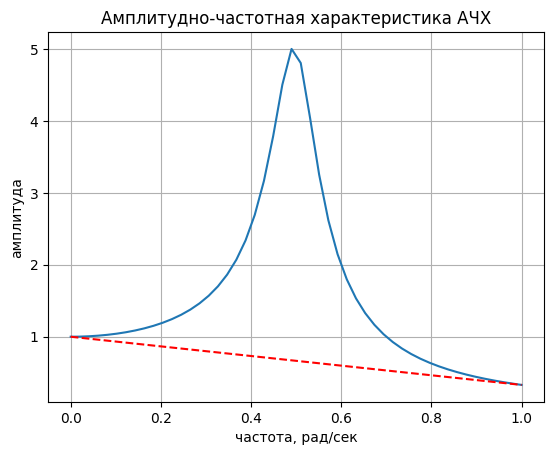

In [ ]:
mag, phase, omega = control.freqresp(W,np.linspace(0,1))
plt.plot(omega, mag)
plt.title("Амплитудно-частотная характеристика АЧХ")
plt.xlabel("частота, рад/сек")
plt.ylabel("амплитуда")
plt.grid()
plt.plot([omega[0],omega[-1]],[mag[0],mag[-1]],'r--')

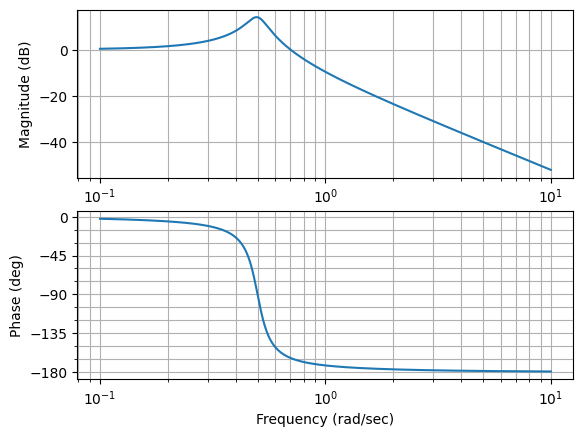

In [ ]:
#изображение логарифмической частотной характеристики = ЛАХ
fig = plt.figure()
mag, phase, omega = control.bode_plot(W, dB = True, Hz = False)

Частота =  0.5  Гц
Амплитуда =  4.165573454747496


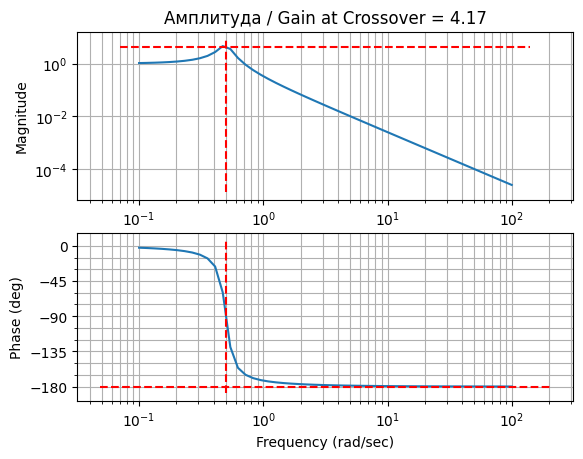

In [ ]:
# строим ЛАХ и определяем точку пересечения на уровне -180
mag,phase,omega = control.bode(W, np.logspace(-1,2));

# определяем точку пересечения на заданной частоте
wc = np.interp(-180.0*np.pi/180,np.flipud(phase),np.flipud(omega))
# определяем значение амплитуды на выбранной частоте
wc = 1/T
Kcu = np.interp(wc,omega,mag)

print('Частота = ', wc, ' Гц')
print('Амплитуда = ', Kcu)

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[Kcu,Kcu],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Амплитуда / Gain at Crossover = {0:.3g}".format(Kcu))

plt.sca(ax2)                 # phase plot
plt.plot(plt.xlim(),[-180,-180],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')

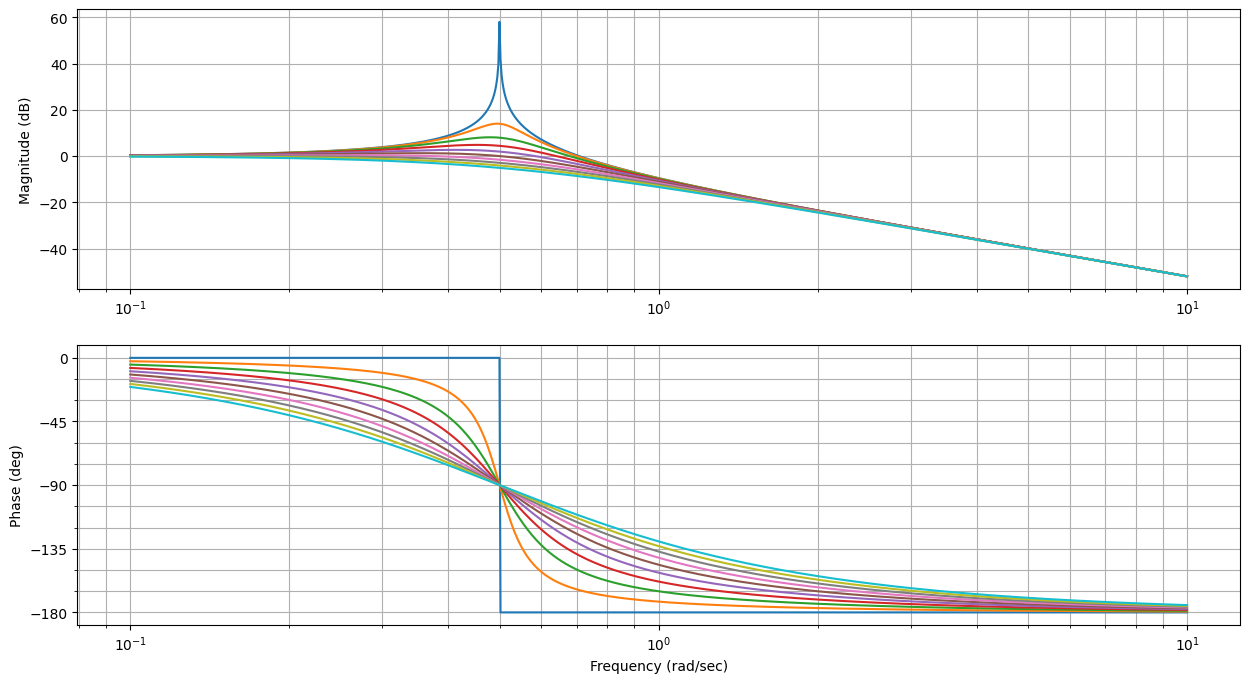

In [ ]:
#колебательное звено
fig = plt.figure(figsize=(15,8))

#смотрим набор функций
for x in range(0,10):
  K = 1
  T = 2
  zeta = 0.1*x
  num = np.array([K])
  den = np.array([T**2, 2*T*zeta, 1])
  W = control.tf(num, den)
  control.bode_plot(W, dB = True, Hz = False)

0

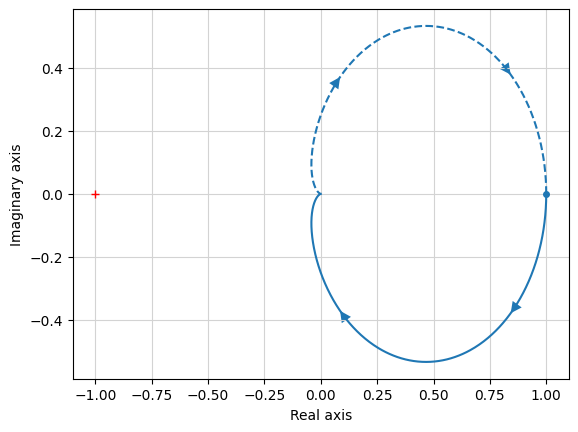

In [ ]:
#изображение АФЧХ - амплитудно-фазо частотная характеристика
control.nyquist_plot(W)

# ABCD представление системы


In [ ]:
pip freeze

In [2]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 7.5 MB/s eta 0:00:00


In [3]:
import control
import matplotlib.pyplot as plt
import numpy as np

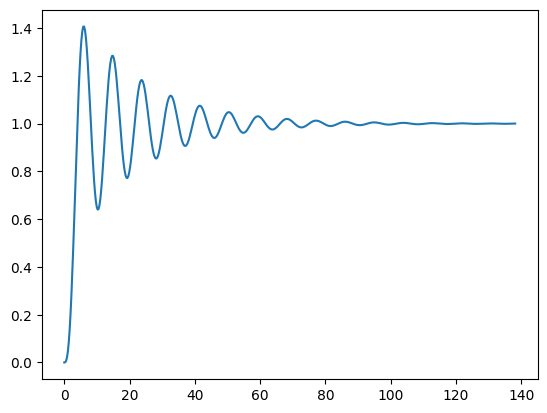

In [79]:
W = control.tf([1],[2, 0.2, 1]) * control.tf([1],[2, 1])
t, y = control.step_response(W)
plt.plot(t, y)

In [32]:
W

TransferFunction(array([1.]), array([4. , 2.4, 2.2, 1. ]))

In [34]:
t = np.arange(0, 100, 0.5)
u = np.sin(1/2*np.pi*t)

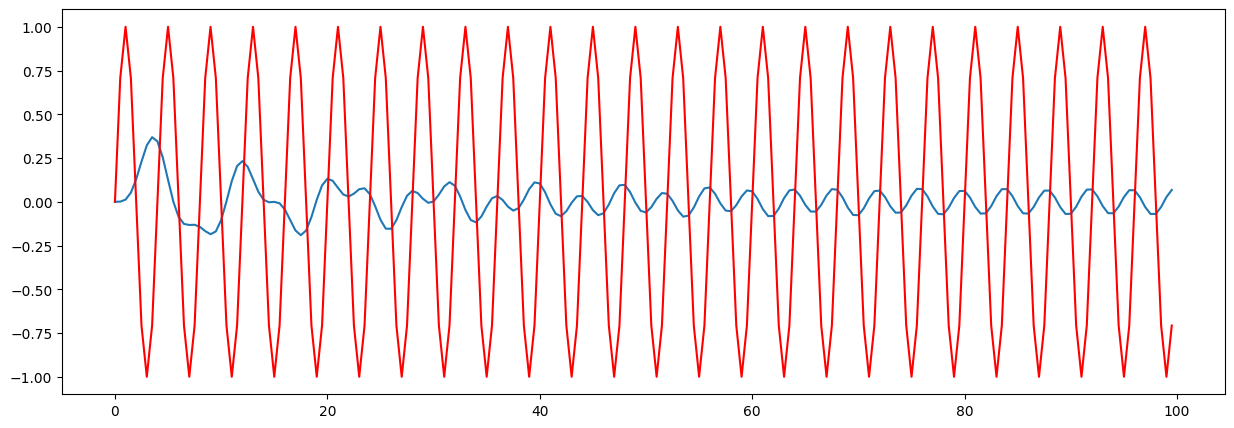

In [35]:
t, y = control.forced_response(W, t, u)
plt.figure(figsize=(15,5))
plt.plot(t, y, label='y_0')
plt.plot(t,u, 'r')

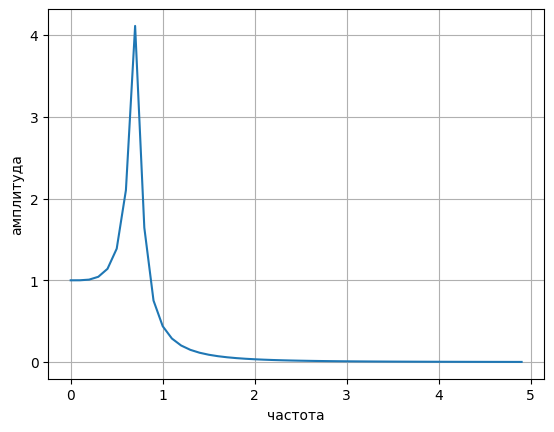

In [36]:
x_omega = np.arange(0,5,0.1)
mag, phase, omega = control.freqresp(W, x_omega)
plt.plot(omega,mag)
plt.xlabel('частота')
plt.ylabel('амплитуда')
plt.grid()
plt.show()

In [78]:
sysABCD = control.tf2ss(W)
sysABCD.A

matrix([[-0.1, -0.5],
        [ 1. ,  0. ]])

In [41]:
sysABCD.B
sysABCD.C

matrix([[0.  , 0.  , 0.25]])

In [10]:
Gc_o, T = control.observable_form(sysABCD)

In [11]:
Gc_o

StateSpace(array([[-0.6 ,  1.  ,  0.  ],
       [-0.55,  0.  ,  1.  ],
       [-0.25,  0.  ,  0.  ]]), array([[0.  ],
       [0.  ],
       [0.25]]), array([[1., 0., 0.]]), array([[0.]]))

In [12]:
Gc_r, T = control.reachable_form(sysABCD)

In [13]:
Gc_r

StateSpace(array([[-0.6 , -0.55, -0.25],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ]]), array([[1.],
       [0.],
       [0.]]), array([[0.  , 0.  , 0.25]]), array([[0.]]))

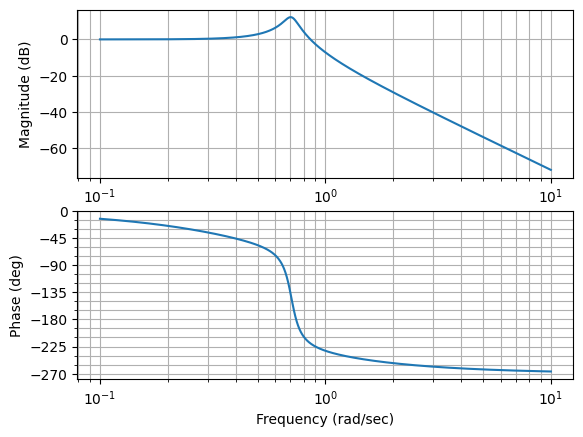

In [44]:
plt.figure()
control.bode(sysABCD)
plt.show()

In [151]:
# определяем ABCD-матрицу системы (пример системы)
A = np.array([[-0.5, -1], [1, 0]]) # матрица A
B = np.array([[1, 0], [0, 1]]) # матрица B
C = np.array([[0, 0], [0, 0]]) # матрица C
D = np.zeros((2, 2)) # матрица D

# решаем задачу с ненаблюдаемой системой
A_n = np.array([[-0.5, -1], [1, 0]])
B_n = np.array([[0, 0], [0, 0]])
C_n = np.array([[1, 0]])
D_n = np.zeros((1, 2))

# Создаем объект состояний sys на основе переданных ей матриц системы A, B, C и D.
# Используется для описания линейной системы в пространстве состояний и
# дальнейшего анализа системы на управляемость и наблюдаемость
#sys = ctl.ss(A, B, C, D)
sys = ctl.ss(A_n, B_n, C_n, D_n)

In [152]:
ctl.poles(sys)

array([-0.25+0.96824584j, -0.25-0.96824584j])

In [153]:
sys

<LinearIOSystem:sys[102]:['u[0]', 'u[1]']->['y[0]']>

In [154]:
# проверяем управляемость системы
# Создаем матрицу управляемости системы.
control_matrix = ctl.ctrb(sys.A, sys.B)

# Вычисляем ранг матрицы управляемости np.linalg.matrix_rank(control_matrix).
# Ранг матрицы управляемости определяет количество независимых столбцов в матрице,
# которые могут быть управляемыми через входные переменные.

uncontrollable_states = sys.A.shape[0] - np.linalg.matrix_rank(control_matrix)

if uncontrollable_states == 0:
    print("Система управляема")
else:
    print(f"Система неуправляема, {uncontrollable_states} состояний неуправляемы")

# проверяем наблюдаемость системы
# Матрица наблюдаемости вычисляется с помощью функции ctl.obsv(sys.A, sys.C).
observation_matrix = ctl.obsv(sys.A, sys.C)

unobservable_states = sys.A.shape[0] - np.linalg.matrix_rank(observation_matrix)

if unobservable_states == 0:
    print("Система наблюдаема")
else:
    print(f"Система ненаблюдаема, {unobservable_states} состояний неравновесны")

Система неуправляема, 2 состояний неуправляемы
Система наблюдаема


IndexError: ignored

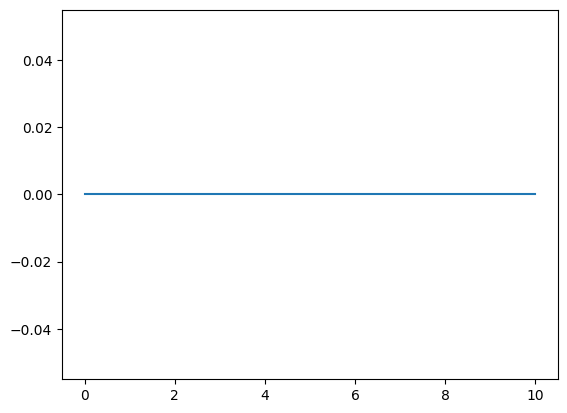

In [155]:
# строим реакцию на ступенчатое воздействие

T = np.linspace(0, 10, 100)
U = np.ones((len(T), 2))
# Функция lsim из библиотеки control используется для численного решения дифференциального уравнения,
# описывающего динамику системы, заданной матрицами A, B, C и D.
Y, T, _ = ctl.lsim(sys, U, T)

# строим график реакции на ступенчатое воздействие
plt.plot(T, Y[:, 0], label="Выход 1")
plt.plot(T, Y[:, 1], label="Выход 2")
plt.legend()
plt.show()

# Качество систем регулирования

In [15]:
control.pole(W)

array([-0.05+0.7053368j, -0.05-0.7053368j, -0.5 +0.j       ])

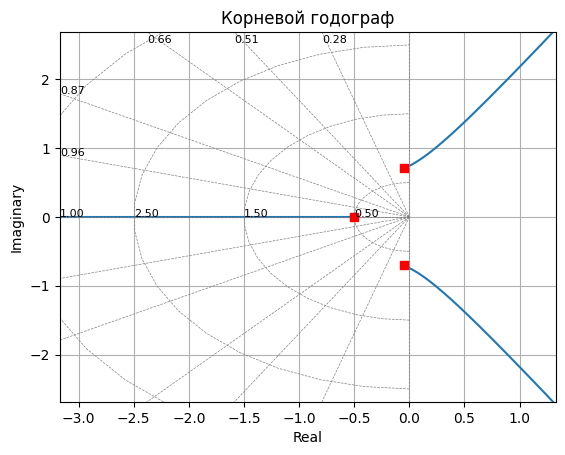

In [16]:
plt.figure()
control.rlocus(W)
for pole in W.pole():
  plt.plot(np.real(pole), np.imag(pole), 'rs')
plt.title('Корневой годограф')
plt.grid()

In [17]:
poles = [-0.1 + 2j, -0.1 - 2j, -0.2]
#poles = [-1, -0.5]

In [18]:
K = control.acker(sysABCD.A, sysABCD.B, poles)
#K = control.place(sysABCD.A, sysABCD.B, poles)
Am = sysABCD.A - sysABCD.B * K
sysABCDm = control.ss(Am, sysABCD.B, sysABCD.C, sysABCD.D)
Wm = control.ss2tf(sysABCDm)
Wm

TransferFunction(array([-1.66533454e-16, -2.66453526e-15,  2.50000000e-01]), array([1.   , 0.4  , 4.05 , 0.802]))

In [19]:
Am

array([[-0.4  , -4.05 , -0.802],
       [ 1.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   ]])

In [20]:
control.pole(Wm)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


array([-0.1+2.j, -0.1-2.j, -0.2+0.j])

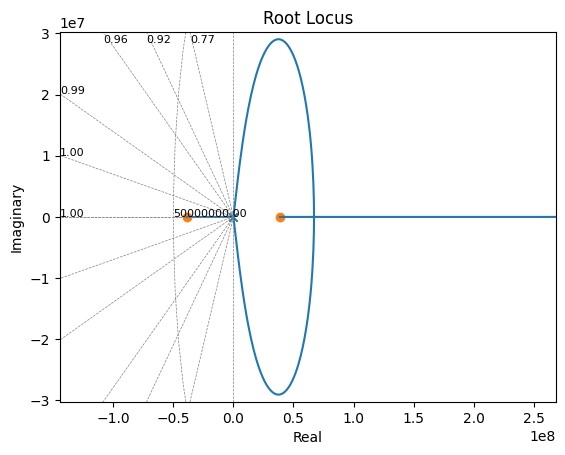

In [21]:
rlist, klist = control.root_locus(Wm, print_gain = False)

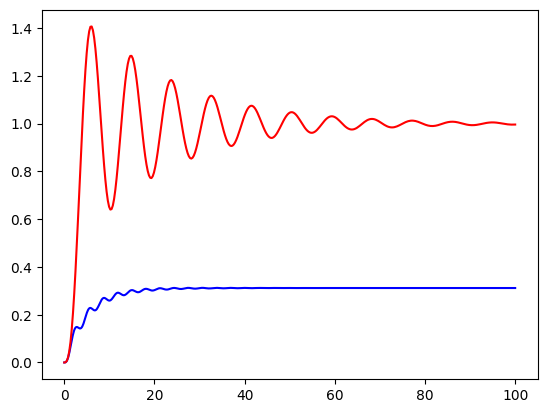

In [22]:
t, y = control.step_response(Wm, 100)
plt.plot(t, y, 'b')

t, y = control.step_response(W, 100)
plt.plot(t, y, 'r')
plt.show()


In [23]:
import numpy as np # библиотека для работы с массивами
import matplotlib.pyplot as plt # библиотека для системного управления

In [24]:
pip install matplotlib

In [25]:
pip install control

In [26]:
pip install numpy

In [27]:
import control.matlab as ctl # библиотека для построения графиков